# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#assess_summary">Assessment Summary</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#explore">Exploratory analysis</a></li>
</ul>

<a id='intro'></a>
# Introduction
* We have dataset of Twitter tweets from [`@dog_rates`](https://twitter.com/dog_rates) also known as `WeRateDogs`.
* Rating has denominator of 10 and numerator is more than 10.
* We have a information about rating, dog names and dog stages
    - Dog stages can be, `doggo`: A big pupper, usually older `pupper`: Small doggo, usually younger. `puppo`: transition phase between pupper and doggo. `blep`: Subtle act that occurs without the knowledge of the one who slips , `snoot`: Nose of dog , `floof`: any dog with excess fur

In [637]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
import os
%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})

<a id='gather'></a>
# Gather data

In [638]:
dog_tweets = pd.read_csv("data/twitter-archive-enhanced.csv")

In [639]:
dog_tweets.shape

(2356, 17)

In [640]:
dog_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Download and save image prediction file

In [641]:
predictions = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [642]:
home_dir = os.getcwd()

In [643]:
os.chdir("./data")

In [644]:
with open("image_prediction.tsv", 'w') as f:
    f.write(predictions.text)    

In [645]:
dog_prediction = pd.read_csv("image_prediction.tsv", sep='\t')

In [646]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [647]:
dog_prediction.shape

(2075, 12)

In [648]:
os.chdir(home_dir)

### Get retweet count and 

In [649]:
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [650]:
os.chdir("./data")

In [16]:
with open("tweet_json.txt", "a+") as fd:
    for tweet_id in dog_tweets.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode="extended")
            fd.write(json.dumps(tweet._json))
            fd.write("\n")
        except tweepy.TweepError:
            print("{} data not available".format(tweet_id))

888202515573088257 data not available
873697596434513921 data not available
872668790621863937 data not available
872261713294495745 data not available
869988702071779329 data not available
866816280283807744 data not available
861769973181624320 data not available
856602993587888130 data not available
851953902622658560 data not available
845459076796616705 data not available
844704788403113984 data not available
842892208864923648 data not available
837366284874571778 data not available
837012587749474308 data not available
829374341691346946 data not available
827228250799742977 data not available
812747805718642688 data not available
802247111496568832 data not available
779123168116150273 data not available
775096608509886464 data not available
770743923962707968 data not available
760153949710192640 data not available


Rate limit reached. Sleeping for: 550


754011816964026368 data not available
680055455951884288 data not available


Rate limit reached. Sleeping for: 743


In [651]:
with open('retweet_likes.csv', 'a+') as file:
    with open('tweet_json.txt', 'r') as fd:
        for tweet_data in fd:
            json_data = json.loads(tweet_data)
            file.write(json_data["id_str"] + "," + str(json_data["retweet_count"]) + "," + 
                       str(json_data["favorite_count"]) + "\n")

In [652]:
retweet_like = pd.read_csv("retweet_likes.csv", header=None)

In [653]:
retweet_like.columns = ["tweet_id", "retweet_count", "favorite_count"]
retweet_like.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7907,37038
1,892177421306343426,5875,31874
2,891815181378084864,3878,24005
3,891689557279858688,8062,40374
4,891327558926688256,8745,38584


In [654]:
retweet_like.shape

(2332, 3)

In [655]:
os.chdir(home_dir)

--------------

<a id='assess'></a>
# Assess Data

#### Is there any duplicate tweet data?

In [656]:
retweet_like.tweet_id.duplicated().sum()

0

In [657]:
dog_prediction.tweet_id.duplicated().sum()

0

In [658]:
dog_tweets.tweet_id.duplicated().sum()

0

#### Check for data types

In [659]:
dog_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [660]:
dog_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

* `tweet_id` should be string, as it does not make sense to perform arithmetic operation on it.

In [661]:
retweet_like.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


* Again, `tweet_id` should be string.

In [662]:
dog_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [663]:
dog_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


* `tweet_id` should be string.
* `timestamp` and `retweeted_status_timestamp` data type should be datetime, not an object.

#### Check for null values

In [664]:
dog_tweets.shape

(2356, 17)

In [665]:
dog_tweets.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

* Majority of data in columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are missing, so best bet would be to drop those columns.

* `expanded_urls` have few missing values, which means some records had no images. Any ratings without images should not be taking into account.

In [666]:
dog_tweets.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [667]:
dog_tweets.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [668]:
dog_tweets.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [669]:
dog_tweets.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

* `name`, `doggo`, `floofer`, `pupper`, `puppo` has None denoted as string, so which avoid us from finding NaN values directly

In [670]:
retweet_like.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [671]:
dog_tweets.retweeted_status_id.notna().sum()

181

* There are 181 retweeted posts. We should not consider them in analysis. We will get rid of it.

#### Check ratings of dogs photos

In [672]:
dog_tweets.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [673]:
pd.set_option('display.max_colwidth', -1)
dog_tweets[dog_tweets.rating_denominator != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [674]:
dog_tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [675]:
dog_tweets[(dog_tweets.rating_numerator >= 15) | (dog_tweets.rating_numerator < 10) ][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
229,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
285,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15,10
290,@markhoppus 182/10,182,10
291,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10


* By checking ratings whose denominator are not 10 and numerator are extremes we can see that there is a parsing error. We have to handle it. There is a one numerator with value 13.5, we should consider it and make the attribute of type float.

In [676]:
dog_tweets.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

* We can clean `source` columns to designate proper source of the tweet

In [677]:
(dog_tweets.name == 'None').sum()

745

In [678]:
dog_tweets[(dog_tweets.doggo == 'None') & (dog_tweets.floofer == 'None') & 
           (dog_tweets.pupper == 'None') & (dog_tweets.puppo == 'None')].shape

(1976, 17)

* For most of the records, we do not have available entries.

* These attributes violates each variable forms column requirement of the tidiness. We have to combine dog types to single column, then change it's type to category which will significantly reduce memory usage.

In [679]:
mask = dog_tweets[['doggo', 'pupper', 'floofer', 'puppo']] != 'None'

In [680]:
mask = mask.sum(axis = 1)

In [681]:
dog_tweets[mask > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377

* These entries are having multiple dog age type. We will introduce new category called 'multiple'.

#### Check `name` columns values in `dog_tweets` dataframe

In [682]:
pd.options.display.max_rows=1000

In [683]:
dog_tweets.name.value_counts()

None              745
a                 55 
Charlie           12 
Oliver            11 
Lucy              11 
Cooper            11 
Penny             10 
Tucker            10 
Lola              10 
Winston           9  
Bo                9  
the               8  
Sadie             8  
Buddy             7  
Toby              7  
Bailey            7  
an                7  
Daisy             7  
Leo               6  
Jax               6  
Oscar             6  
Dave              6  
Jack              6  
Koda              6  
Bella             6  
Milo              6  
Stanley           6  
Scout             6  
Rusty             6  
Larry             5  
Sammy             5  
very              5  
Sunny             5  
Finn              5  
George            5  
Bentley           5  
Alfie             5  
Gus               5  
Phil              5  
Chester           5  
Oakley            5  
Louis             5  
Maddie            4  
Cassie            4  
Sophie            4  
Beau      

In [684]:
dog_tweets.name[dog_tweets.name.str.len() <= 2].value_counts()

a     55
Bo    9 
an    7 
by    1 
Al    1 
O     1 
Ed    1 
Jo    1 
JD    1 
my    1 
Mo    1 
Name: name, dtype: int64

* From above analysis we can see something weird for lowercased names. Let's check it out.

In [685]:
dog_tweets.name[dog_tweets.name.str.islower()].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
actually        2 
getting         2 
not             2 
mad             2 
this            1 
old             1 
incredibly      1 
infuriating     1 
by              1 
his             1 
all             1 
my              1 
such            1 
officially      1 
life            1 
space           1 
unacceptable    1 
light           1 
Name: name, dtype: int64

* All lower case letters are invalid names, may be because of bad parsing. Let's check it out.

In [686]:
dog_tweets[dog_tweets.name.str.islower()][['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


* Make all names Title case
* We will clean bad names.

<a id='assess_summary'></a>

# Assessment Summary

## Tidiness Issues
* create new column named `age_category` which combines columns attributes `doggo`, `floofer`, `pupper` and, `puppo`. Add new type called 'multiple' for records with multiple age type. Convert its type to category
* We have three dataframes, all are part of one observational unit we should combine all dataframes into one.

## Quality Issues
- `dog_tweets` dataframe,
    - Convert type of `tweet_id` to string
    - remove records which are retweeted.
    - Remove records which does not have images attached, means `expanded_urls` are missing.
    - Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`
    - We need to convert data type of `timestamp` to datetime.
    - Clean `source` columns to designate proper source of the tweet and convert its type to category
    - Clean `name`.
    - Handle `rating_denominator` and `rating_numerator` bad values.
    - Properly denote null values for `name`, `doggo`, `floofer`, `pupper`, `puppo`.
- `dog_prediction` dataframe,
    - Convert type of `tweet_id` to string
    - Make prediction of dog breed text similar cased.
- `retweet_like` dataframe
    - Convert type of `tweet_id` to string    

-------------

<a id='clean'></a>
# Data Cleaning

In [1000]:
dog_prediction_cleaned = dog_prediction.copy(deep=True)
retweet_like_cleaned = retweet_like.copy(deep=True)

### 1. Properly denote null values for `name`, `doggo`, `floofer`, `pupper`, `puppo`
* Let's directly mention it as `na_values` in `read_csv` function when we read it.

#### Code

In [1001]:
dog_tweets_cleaned = pd.read_csv("data/twitter-archive-enhanced.csv", na_values = 'None')

#### Test

In [1002]:
dog_tweets_cleaned.name.isna().sum()

745

In [1003]:
dog_tweets_cleaned.doggo.isna().sum()

2259

In [1004]:
dog_tweets_cleaned.floofer.isna().sum()

2346

In [1005]:
dog_tweets_cleaned.pupper.isna().sum()

2099

In [1006]:
dog_tweets_cleaned.puppo.isna().sum()

2326

In [1007]:
dog_tweets_cleaned.puppo.value_counts(dropna=False)

NaN      2326
puppo    30  
Name: puppo, dtype: int64

### 2. Convert type of `tweet_id` to string

#### code

In [1008]:
dog_tweets_cleaned.tweet_id = dog_tweets_cleaned.tweet_id.astype(str)
retweet_like_cleaned.tweet_id = retweet_like_cleaned.tweet_id.astype(str)
dog_prediction_cleaned.tweet_id = dog_prediction_cleaned.tweet_id.astype(str)

#### Test

In [1009]:
dog_tweets_cleaned.tweet_id.dtype

dtype('O')

In [1010]:
retweet_like_cleaned.tweet_id.dtype

dtype('O')

In [1011]:
dog_prediction_cleaned.tweet_id.dtype

dtype('O')

### 3. Remove the records which are re-tweeted

#### Code

In [1012]:
total_records_before = dog_tweets_cleaned.shape[0]

In [1013]:
total_retweeted_records = dog_tweets_cleaned[dog_tweets_cleaned.retweeted_status_id.notna()].shape[0]

In [1014]:
dog_tweets_cleaned = dog_tweets_cleaned[dog_tweets_cleaned.retweeted_status_id.isna()]

#### Test

In [1015]:
total_records_after = dog_tweets_cleaned.shape[0]

In [1016]:
dog_tweets_cleaned[dog_tweets_cleaned.retweeted_status_id.notna()].shape[0]

0

In [1017]:
assert (total_records_before - total_records_after) == total_retweeted_records

### 4. Remove the records whose `expanded_url` is missing

#### Code

In [1018]:
total_records_before = dog_tweets_cleaned.shape[0]

In [1019]:
total_records_to_remove = dog_tweets_cleaned[dog_tweets_cleaned.expanded_urls.isna()].shape[0]

In [1020]:
dog_tweets_cleaned = dog_tweets_cleaned[dog_tweets_cleaned.expanded_urls.notna()]

#### Test

In [1021]:
total_records_after = dog_tweets_cleaned.shape[0]

In [1022]:
assert total_records_before == total_records_after + total_records_to_remove

In [1023]:
dog_tweets_cleaned[dog_tweets_cleaned.expanded_urls.isna()].shape[0]

0

### 5. Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`

#### Code

In [1024]:
dog_tweets_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                         'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True, axis=1)

#### Test

In [1025]:
dog_tweets_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 6. Convert data type of `timestamp` to datetime

#### Code

In [1026]:
dog_tweets_cleaned.timestamp = pd.to_datetime(dog_tweets_cleaned.timestamp)

#### Test

In [1027]:
dog_tweets_cleaned[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 1 columns):
timestamp    2117 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 33.1 KB


### 7. Clean `source` columns to designate proper source of the tweet and convert its type to category.

#### Code

In [1028]:
dog_tweets_cleaned.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [1029]:
mapping = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':"iPhone", 
           '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':"Vine",
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':"Web Client",
           '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':"TweetDeck"}
dog_tweets_cleaned.source = dog_tweets_cleaned.source.map(mapping)

In [1030]:
dog_tweets_cleaned.source = dog_tweets_cleaned.source.astype('category')

#### Test

In [1031]:
dog_tweets_cleaned.source.value_counts()

iPhone        1985
Vine          91  
Web Client    30  
TweetDeck     11  
Name: source, dtype: int64

In [1032]:
dog_tweets_cleaned.source.dtype

CategoricalDtype(categories=['TweetDeck', 'Vine', 'Web Client', 'iPhone'], ordered=False)

### 8. Clean `name`

#### Code

In [1033]:
dog_tweets_cleaned[(dog_tweets_cleaned.name.notna()) & (dog_tweets_cleaned.name.str.islower())][['text', 'name']]

,text,name
22,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
169,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
801,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
819,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


* With visual analysis we can notice that, for many of the tweets, actual name starts after 'is' and 'named' starting with capital letter.

In [1034]:
clean_names = dog_tweets_cleaned.text[(dog_tweets_cleaned.name.notna()) & 
                                      (dog_tweets_cleaned.name.str.islower())].str.extract(r' (is|named) ([A-Z].+?)[\b.,]')[1]
clean_names = clean_names[clean_names.notna()]

* Let's impute those names in dataframe.

In [1035]:
dog_tweets_cleaned.name[clean_names.index] = clean_names;

C:\Users\davep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


* Let's mark all other lowercased names as missing values.

In [1036]:
lowercase_idx = dog_tweets_cleaned.name[(dog_tweets_cleaned.name.notna()) & (dog_tweets_cleaned.name.str.islower())].index

In [1037]:
dog_tweets_cleaned.name[lowercase_idx] = None

C:\Users\davep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [1038]:
dog_tweets_cleaned.name[clean_names.index]

852     Zoey         
992     Quizno       
1853    Wylie        
1955    Kip          
2034    Jacob (Yacōb)
2066    Rufus        
2116    Spork        
2125    Cherokee     
2128    Hemry        
2146    Alphred      
2161    Alfredo      
2191    Leroi        
2204    Berta        
2218    Chuk         
2235    Alfonso      
2249    Cheryl       
2255    Jessiga      
2264    Klint        
2273    Kohl         
2287    Daryl        
2304    Pepe         
2311    Octaviath    
2314    Johm         
Name: name, dtype: object

In [1039]:
dog_tweets_cleaned[(dog_tweets_cleaned.name.notna()) & (dog_tweets_cleaned.name.str.islower())].name.shape[0]

0

In [1040]:
dog_tweets_cleaned.name.dtype

dtype('O')

### 9. Handle `rating_denominator` and `rating_numerator` bad values.

#### Code (Clean numerator)

* Using visual analysis I found some of the ratings have floating type. Let's find those entries.

In [1041]:
dog_tweets_cleaned[dog_tweets_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator', 'rating_denominator']]

C:\Users\davep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


* Some tweet text also contains multiple ratings. Looks like original parser only took first rating in consideration. Let's find those tweets with multiple ratings.

In [1042]:
parsed_ratings = dog_tweets_cleaned.text.str.extractall(r"(\d+\/\d+)")

In [1043]:
double_ratings_idx = parsed_ratings.xs(1, level="match").index

In [1044]:
dog_tweets_cleaned.loc[double_ratings_idx, ['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1222,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1359,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1465,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10
1508,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10


* At index 1068, score was parsed as 9/11, but actually is 14/10.
* At index 1165 score should be 13/10.
* At index 1202 score should be 11/10.
* At index 1459 score should be 13/10.
* At index 1662 score should be 10/10.
* At index 2335 score should be 9/10.

In [1045]:
idx = [45, 695, 763, 1712, 1068, 1165, 1202, 1459, 1662, 2335]
numerator = [13.5, 9.75, 11.27, 11.26, 14, 13, 11, 13, 10, 9]

In [1046]:
def clean_numerator(idx, numerator):
    dog_tweets_cleaned.loc[idx, 'rating_numerator'] = numerator
    dog_tweets_cleaned.loc[idx, 'rating_denominator'] = 10

In [1047]:
clean_numerator(idx, numerator)

#### Test

In [1048]:
dog_tweets_cleaned.loc[idx, ['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
45,13.50,10
695,9.75,10
763,11.27,10
1712,11.26,10
1068,14.00,10
1165,13.00,10
1202,11.00,10
1459,13.00,10
1662,10.00,10
2335,9.00,10


#### Code (Clean denominator)

In [1049]:
dog_tweets_cleaned[dog_tweets_cleaned.rating_denominator != 10][['text', 'rating_denominator']]

,text,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1433,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",130


* For record 516, 24/7 means all the time, which is not an rating. We will clean numerator and denominator.
* Everything else seems good.

In [1050]:
dog_tweets_cleaned.loc[516, ['rating_numerator', 'rating_denominator']] = np.nan

#### Test

In [1051]:
dog_tweets_cleaned.loc[516, ['rating_numerator', 'rating_denominator']]

rating_numerator      NaN
rating_denominator    NaN
Name: 516, dtype: object

### 10. Clean dog breed prediction type to lowercase

#### Code

In [1052]:
dog_prediction_cleaned.p1 = dog_prediction_cleaned.p1.str.lower()
dog_prediction_cleaned.p2 = dog_prediction_cleaned.p2.str.lower()
dog_prediction_cleaned.p3 = dog_prediction_cleaned.p3.str.lower()

#### Test

In [1053]:
assert dog_prediction_cleaned.p1.str.islower().sum() == dog_prediction_cleaned.shape[0]
assert dog_prediction_cleaned.p2.str.islower().sum() == dog_prediction_cleaned.shape[0]
assert dog_prediction_cleaned.p3.str.islower().sum() == dog_prediction_cleaned.shape[0]

### 11. Combine dog age category

#### Code (Handle records which has multiple age categories set)

In [1054]:
mask = dog_tweets_cleaned[['doggo', 'pupper', 'floofer', 'puppo']].notnull()
mask = mask.sum(axis = 1)
idx = dog_tweets_cleaned[mask > 1].index

In [1055]:
dog_tweets_cleaned['age_category'] = np.nan
dog_tweets_cleaned.age_category[idx] = 'multiple'

C:\Users\davep\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [1056]:
dog_tweets_cleaned.age_category[idx]

191     multiple
200     multiple
460     multiple
531     multiple
565     multiple
575     multiple
705     multiple
733     multiple
889     multiple
956     multiple
1063    multiple
1113    multiple
Name: age_category, dtype: object

#### Code (Combine the 4 columns into `age_category`)

In [1057]:
combined_col = dog_tweets_cleaned.pupper\
.combine_first(dog_tweets_cleaned.doggo)\
.combine_first(dog_tweets_cleaned.puppo)\
.combine_first(dog_tweets_cleaned.floofer)

In [1058]:
combined_col.notna().sum()

338

In [1059]:
dog_tweets_cleaned.age_category[dog_tweets_cleaned.age_category.isna()] = combined_col;

C:\Users\davep\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1060]:
dog_tweets_cleaned.drop(['pupper', 'puppo', 'doggo','floofer'], axis=1, inplace=True)

In [1061]:
dog_tweets_cleaned.age_category = dog_tweets_cleaned.age_category.astype('category')

#### Test

In [1062]:
assert combined_col.notna().sum() == dog_tweets_cleaned.age_category.notna().sum()

In [1063]:
dog_tweets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null category
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2116 non-null float64
rating_denominator    2116 non-null float64
name                  1414 non-null object
age_category          338 non-null category
dtypes: category(2), datetime64[ns](1), float64(2), object(4)
memory usage: 216.8+ KB


### 12. Merge all dataframes

#### Code

In [1064]:
twitter_archive_master = dog_tweets_cleaned.merge(retweet_like_cleaned, how='inner').merge(dog_prediction_cleaned, how='inner')

#### Test

In [1065]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,age_category,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,7907,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,5875,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,3878,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,8062,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,8745,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [1066]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 22 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null category
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
name                  1366 non-null object
age_category          305 non-null category
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               198

----------------

# Store cleaned dataframes

In [1067]:
twitter_archive_master.to_csv("data/twitter_archive_master.csv", index=False)

---------------

<a id='explore'></a>
# Data Exploration

In [1093]:
twitter_archive_master = pd.read_csv("data/twitter_archive_master.csv", parse_dates = ['timestamp'], 
                                     dtype = {'tweet_id':'str', 'source':'category', 'age_category':'category'})

In [1094]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 22 columns):
tweet_id              1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null category
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1986 non-null float64
rating_denominator    1986 non-null float64
name                  1366 non-null object
age_category          305 non-null category
retweet_count         1987 non-null int64
favorite_count        1987 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               198

* Let's focus on `retweet_count`, `favorite_count`, `rating_numerator`, `rating_denominator`, `age_category`, `source`.

In [1095]:
color = sns.color_palette()[0]

### Distribution of dog stages

In [1096]:
twitter_archive_master.age_category.value_counts()

pupper      203
doggo       62 
puppo       22 
multiple    11 
floofer     7  
Name: age_category, dtype: int64

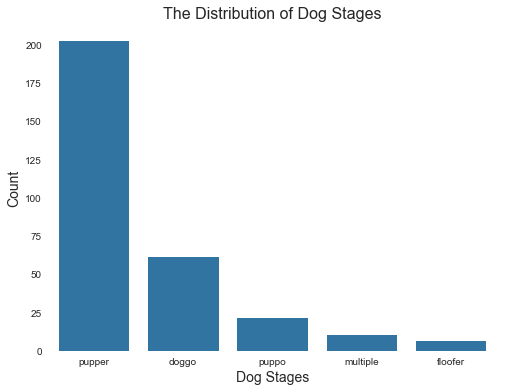

In [1097]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sorted_stage = twitter_archive_master.age_category.value_counts().index
sns.countplot(data = twitter_archive_master, x = 'age_category', color=color, order=sorted_stage)

plt.xlabel("Dog Stages", fontsize=14)
plt.ylabel("Count",  fontsize=14)
plt.title("The Distribution of Dog Stages", fontsize=16)

for side in ["left", "right", "top", "bottom"]:
    ax.spines[side].set_visible(False)
    
plt.savefig("data/dog_stage_distribution.png")

* First of all there is a huge amount of missing data so, distribution may not reflect the truth.
* Pupper (small, younger doggo) are most popular. May be they are unmatured and cuter than adult dog, so people like to post their photos

### Distribution of `source`

In [1098]:
twitter_archive_master.source.value_counts()

iPhone        1949
Web Client    28  
TweetDeck     10  
Name: source, dtype: int64

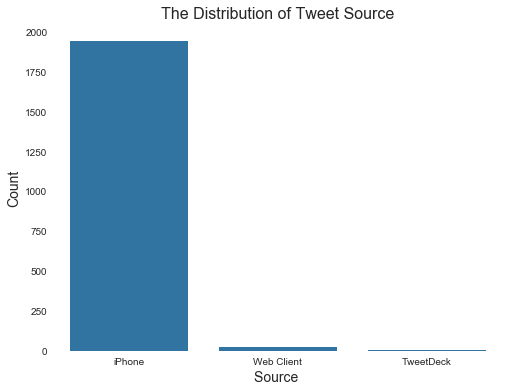

In [1099]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sorted_stage = twitter_archive_master.source.value_counts().index[:3]
sns.countplot(data = twitter_archive_master, x = 'source', color=color, order=sorted_stage)
plt.xlabel("Source ", fontsize=14)
plt.ylabel("Count",  fontsize=14)
plt.title("The Distribution of Tweet Source", fontsize=16)
for side in ["left", "right", "top", "bottom"]:
    ax.spines[side].set_visible(False)
    
plt.savefig("data/tweet_source_distribution.png")

* Dominate source of tweets is from iPhone twitter App, which is 94% in total. Twitter app is the main channel for people using to tweet, retweet, post, while TweetDeck is very rare.

### Correlation between `retweet_count` and `favorite_count`

C:\Users\davep\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


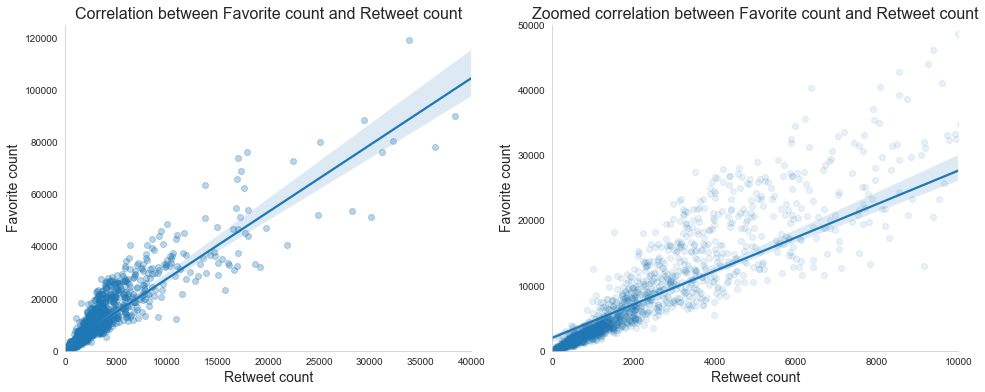

In [1100]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
sns.regplot(data = twitter_archive_master, x="retweet_count", y= "favorite_count", scatter_kws={'alpha':0.3}, ax = ax[0])
ax[0].set_xlim(0, 40000)
ax[0].set_ylim(0, 125000)
ax[0].set_title("Correlation between Favorite count and Retweet count", fontsize = 16)
ax[0].set_xlabel("Retweet count", fontsize = 14)
ax[0].set_ylabel("Favorite count", fontsize = 14)
for side in ["right", "top"]:
    ax[0].spines[side].set_visible(False)
    
sns.regplot(data = twitter_archive_master, x="retweet_count", y= "favorite_count", scatter_kws={'alpha':0.1}, ax=ax[1], color=color);
ax[1].set_xlim(0, 10000)
ax[1].set_ylim(0, 50000)
ax[1].set_title("Zoomed correlation between Favorite count and Retweet count", fontsize = 16)
ax[1].set_xlabel("Retweet count", fontsize = 14)
ax[1].set_ylabel("Favorite count", fontsize = 14)

for side in ["right", "top"]:
    ax[1].spines[side].set_visible(False)
    
plt.savefig("data/correlation_favorite_retweet_count.png");

In [1101]:
twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count)

0.9292462696254251

* Correlation between `retweet_count` and `favorite_count` is 0.93, this high value is showing strong positive correlation between those two attributes. Plot also confirms this.

### How accurate is the first dog prediction

In [1102]:
twitter_archive_master.p1_dog.value_counts()

True     1470
False    517 
Name: p1_dog, dtype: int64

In [1103]:
twitter_archive_master.p1.value_counts()[:10]

golden_retriever      139
labrador_retriever    93 
pembroke              88 
chihuahua             79 
pug                   54 
chow                  41 
samoyed               39 
pomeranian            38 
toy_poodle            37 
malamute              29 
Name: p1, dtype: int64

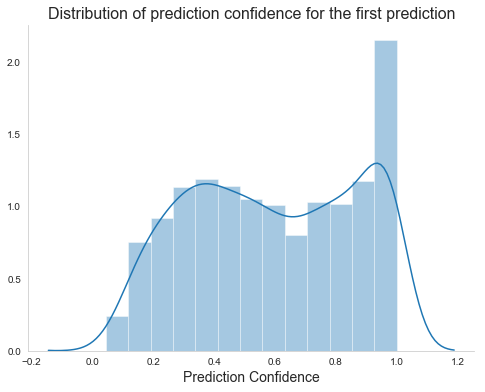

In [1104]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

sns.distplot(twitter_archive_master.p1_conf);
plt.title("Distribution of prediction confidence for the first prediction", fontsize = 16)
plt.xlabel("Prediction Confidence", fontsize = 14)
for side in ["right", "top"]:
    ax.spines[side].set_visible(False)
plt.savefig("data/first_prediction_conf_dist.png");

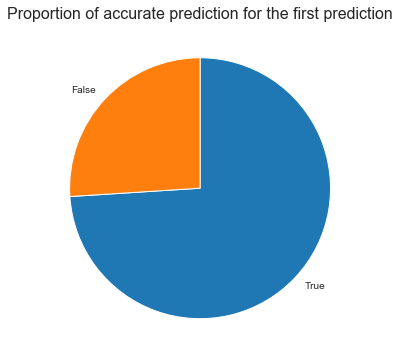

In [1105]:
plt.figure(figsize=(8,6));
true_prediction_count = twitter_archive_master.p1_dog.value_counts()
plt.pie(true_prediction_count, startangle=90, counterclock=False, labels = true_prediction_count.index);
plt.title("Proportion of accurate prediction for the first prediction", fontsize = 16)
plt.savefig("data/first_prediction_accuracy_pie.png");

* First plot shows distribution of prediction success rate of whether or not first prediction is breed of dog or not.
* Pie chart shows that almost 2/3 times prediction are correct. For neural network model it is not good accuracy.